Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top Influential Words for Label abrasive finishing products: [('wheel', 10), ('disc', 9), ('grit', 8), ('sanding', 6), ('pack', 6), ('rake', 5), ('sander', 5), ('x', 4), ('polishing', 4), ('5', 4)]
Top Influential Words for Label arts crafts sewing storage: [('storage', 24), ('box', 12), ('organizer', 9), ('case', 9), ('jewelry', 7), ('holder', 7), ('sewing', 7), ('art', 5), ('large', 5), ('bag', 5)]
Top Influential Words for Label automotive tools equipment: [('tool', 10), ('kit', 9), ('air', 8), ('set', 7), ('4', 6), ('12', 6), ('auto', 6), ('tire', 6), ('impact', 6), ('pad', 5)]
Top Influential Words for Label accessories supplies: [('cable', 22), ('card', 17), ('usb', 13), ('charger', 11), ('iphone', 10), ('sd', 9), ('c', 9), ('compatible', 8), ('memory', 8), ('2', 7)]
Top Influential Words for Label arts crafts supplies: [('sticker', 18), ('craft', 13), ('make', 9), ('party', 8), ('pack', 8), ('tool', 8), ('twine', 8), ('kid', 7), ('diy', 7), ('soccer', 6)]
Top Influential Words f

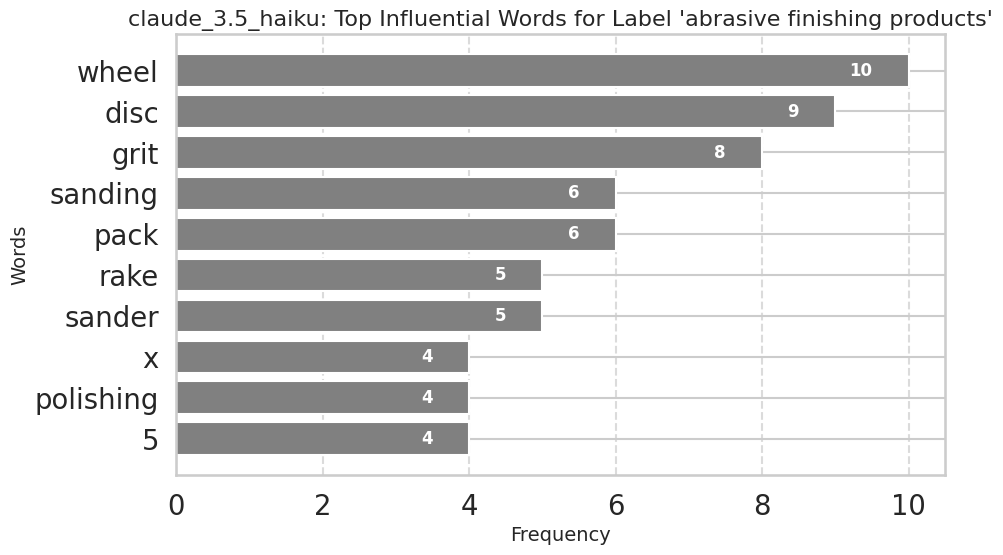

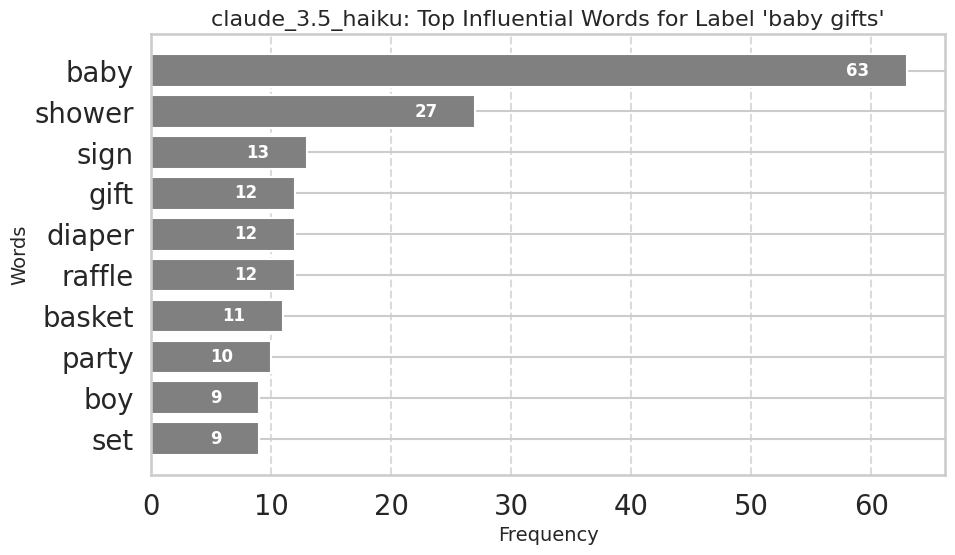

In [26]:
!pip install nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/gdrive')

# Download necessary NLTK data
nltk.download('punkt')       # Download the 'punkt' tokenizer
# Download the 'punkt_tab' data package
nltk.download('punkt_tab')
nltk.download('stopwords')   # Download the stopwords
nltk.download('wordnet')     # Download the 'wordnet' for lemmatization

class InfluentialWordsAnalyzer:
    def __init__(self, data, feature_column, prediction_column):
        """
        Initializes the analyzer with the dataset and column names.

        Parameters:
        - data: Pandas DataFrame containing the dataset.
        - feature_column: Column name containing the text data.
        - prediction_column: Column name containing the labels (can be strings or integers).
        """
        self.data = data
        self.feature_column = feature_column
        self.prediction_column = prediction_column
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.word_label_counts = {}
        self.unique_labels = []

    def preprocess_text(self, text):
        """Preprocesses text by tokenizing, removing stopwords, punctuation, and lemmatizing."""
        if not isinstance(text, str):
            return []
        text = text.lower()
        words = word_tokenize(text)
        return [
            self.lemmatizer.lemmatize(word)
            for word in words
            if word not in self.stop_words and word not in string.punctuation
        ]

    def analyze(self):
        """Processes the dataset and calculates word frequencies for each label."""
        # Preprocess the feature column
        self.data['processed_text'] = self.data[self.feature_column].apply(self.preprocess_text)
        # Identify unique labels
        self.unique_labels = self.data[self.prediction_column].unique()
        self.word_label_counts = {label: defaultdict(int) for label in self.unique_labels}

        # Count word occurrences per label
        for _, row in self.data.iterrows():
            words = row['processed_text']
            label = row[self.prediction_column]
            for word in words:
                self.word_label_counts[label][word] += 1

    def get_top_words(self, label, num_words=10):
        """
        Gets the top influential words for a specific label.

        Parameters:
        - label: The label to retrieve top words for.
        - num_words: Number of top words to retrieve.

        Returns:
        A list of tuples containing the word and its frequency.
        """
        if label not in self.word_label_counts:
            return []
        return sorted(self.word_label_counts[label].items(), key=lambda x: x[1], reverse=True)[:num_words]

    def display_top_words(self, num_words=10):
        """Displays the top influential words for each label."""
        for label in self.unique_labels:
            top_words = self.get_top_words(label, num_words)
            print(f"Top Influential Words for Label {label}: {top_words}")


    def plot_top_words(self, label, num_words=10):
        """
        Plots the top influential words for a specific label.

        Parameters:
        - label: The label to plot top words for.
        - num_words: Number of top words to plot.
        """
        top_words = self.get_top_words(label, num_words)
        if not top_words:
            print(f"No data for label: {label}")
            return

        # Extract words and their frequencies
        words, counts = zip(*top_words)

        # Set the style
        sns.set_theme(style="whitegrid", context="talk", font_scale=1.2)
        plt.figure(figsize=(10, 6))

        # Create a horizontal bar plot
        bars = plt.barh(words, counts, color='gray', edgecolor='white')
        plt.xlabel('Frequency', fontsize=14)
        plt.ylabel('Words', fontsize=14)
        plt.title(f'{self.prediction_column.replace("_prediction", "")}: Top Influential Words for Label \'{label}\'', fontsize=16)
        plt.gca().invert_yaxis()  # Invert y-axis for better readability

        # Add numbers inside each bar
        for bar, count in zip(bars, counts):
            plt.text(count - max(counts) * 0.05,  # Position slightly to the left within the bar
                    bar.get_y() + bar.get_height() / 2,  # Center vertically
                    str(count),
                    va='center', ha='right', color='white', fontsize=12, fontweight='bold')

        # Add gridlines and tighten the layout
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

# TODO! I can enhance the code to identify the top influential words specifically for correct predictions or mispredictions.
# Load dataset
data = pd.read_csv('/content/gdrive/My Drive/Projects/ClassificationProductCategories/dataset_split_1.csv')

# Initialize analyzer
analyzer = InfluentialWordsAnalyzer(data, feature_column='title', prediction_column='claude_3.5_haiku_prediction')

# Analyze dataset
analyzer.analyze()

# Display top words for each label
analyzer.display_top_words(num_words=10)

# Plot top words for specific labels
analyzer.plot_top_words(label='abrasive finishing products')
analyzer.plot_top_words(label='baby gifts')